In [162]:
#connecting to google drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [163]:
#packages that were required for the task at hand
import pandas as pd
import numpy as np

from matplotlib import pyplot as plt
import seaborn as sns
import random

from sklearn import preprocessing
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay
from sklearn import metrics
from sklearn.metrics import roc_curve, auc
from sklearn.metrics import roc_auc_score

sns.set_style('darkgrid')

In [164]:
#loading data
df = pd.read_csv('/content/drive/MyDrive/penguins_train.csv')
df.head()

,Island,Clutch Completion,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Sex,Delta 15 N (o/oo),Delta 13 C (o/oo),Species
0,Biscoe,Yes,38.8,17.2,180.0,3800.0,MALE,9.63954,-25.29856,Adelie Penguin (Pygoscelis adeliae)
1,Torgersen,Yes,41.1,18.6,189.0,3325.0,MALE,9.32277,-26.09989,Adelie Penguin (Pygoscelis adeliae)
2,Biscoe,Yes,39.0,17.5,186.0,3550.0,FEMALE,8.57199,-26.07188,Adelie Penguin (Pygoscelis adeliae)
3,Dream,No,39.7,17.9,193.0,4250.0,MALE,9.25769,-25.88798,Adelie Penguin (Pygoscelis adeliae)
4,Biscoe,Yes,47.5,14.2,209.0,4600.0,FEMALE,8.39299,-26.78733,Gentoo penguin (Pygoscelis papua)


In [165]:
#checking the datatype of each attribute
df.dtypes

Island                  object
Clutch Completion       object
Culmen Length (mm)     float64
Culmen Depth (mm)      float64
Flipper Length (mm)    float64
Body Mass (g)          float64
Sex                     object
Delta 15 N (o/oo)      float64
Delta 13 C (o/oo)      float64
Species                 object
dtype: object

**Data Exploration,cleaning and transformation**

In [166]:
#drop duplicates
df = df.drop_duplicates()

In [167]:
#statisics about the numerical attributes
df.describe()

,Culmen Length (mm),Culmen Depth (mm),Flipper Length (mm),Body Mass (g),Delta 15 N (o/oo),Delta 13 C (o/oo)
count,272.000000,272.000000,272.000000,272.000000,262.000000,263.000000
mean,44.011397,17.183088,200.727941,4183.180147,8.750133,-25.668126
std,5.545756,1.955050,14.009205,802.503978,0.562484,0.807465
min,32.100000,13.100000,172.000000,2700.000000,7.632200,-26.896440
25%,39.500000,15.700000,190.000000,3550.000000,8.301823,-26.289360
50%,44.450000,17.300000,197.000000,4000.000000,8.656345,-25.852030
75%,48.725000,18.625000,213.000000,4781.250000,9.190195,-25.014650
max,59.600000,21.500000,231.000000,6300.000000,10.023720,-23.787670


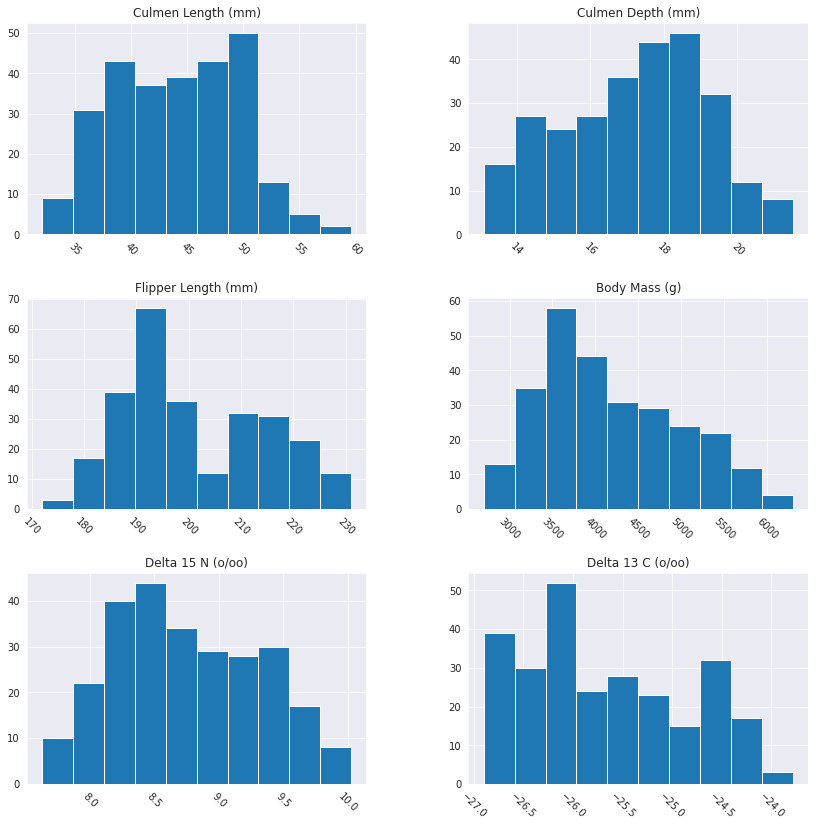

In [168]:
#histogram for each of the numerical attribute
df.hist(figsize= (14,14),xrot=-45)
plt.show()

In [169]:
#statistics about the categorical attributes
df.describe(include=['object'])

,Island,Clutch Completion,Sex,Species
count,274,274,267,274
unique,3,2,3,3
top,Biscoe,Yes,MALE,Adelie Penguin (Pygoscelis adeliae)
freq,132,245,135,121


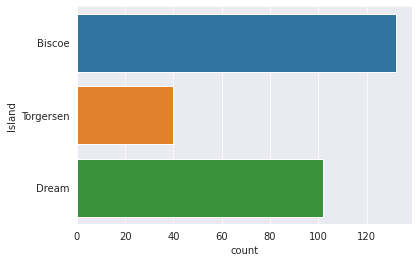

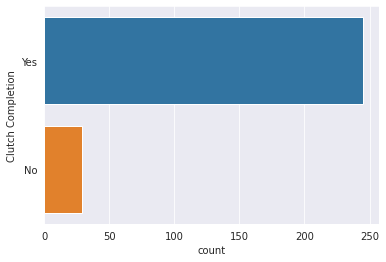

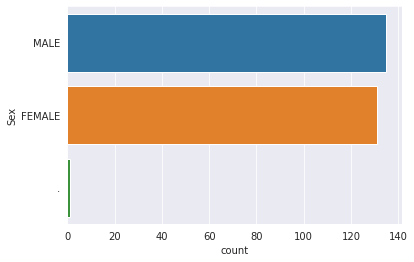

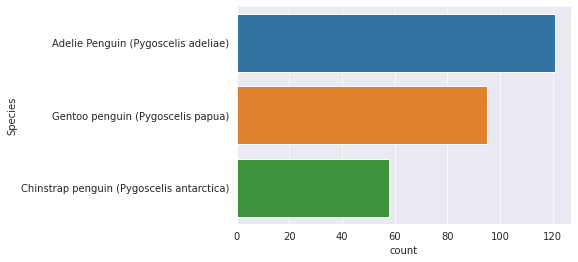

In [170]:
#count plot for each categorical attribute
for feature in df.dtypes[df.dtypes=='object'].index:
  sns.countplot(y =feature,data=df)
  plt.show()

In [171]:
#checking of missing values of categorical values
df.select_dtypes(include=['object']).isnull().sum()

Island               0
Clutch Completion    0
Sex                  7
Species              0
dtype: int64

In [172]:
#filling the nan with the "missing" value
df['Sex'] = df['Sex'].fillna('Missing')
df['Sex'] = df['Sex'].replace('.', 'Missing', regex=False)

In [173]:
df['Sex'] = df['Sex'].replace('.', 'Missing', regex=False)

In [174]:
#checking of missing values of numerical values
df.select_dtypes(exclude=['object']).isnull().sum()

Culmen Length (mm)      2
Culmen Depth (mm)       2
Flipper Length (mm)     2
Body Mass (g)           2
Delta 15 N (o/oo)      12
Delta 13 C (o/oo)      11
dtype: int64

In [175]:
#renaming columns for easy working on them
df.rename(columns = {'Culmen Length (mm)':'culmenlength','Culmen Depth (mm)':'culmendepth','Flipper Length (mm)':'flipperlength',
'Body Mass (g)':'bodymass','Delta 15 N (o/oo)':'delta15N','Delta 13 C (o/oo)':'delta13C','Clutch Completion':'clutchcompletion'}, 
inplace = True)

In [176]:
#checking the nan valued tuples of culmen length
missin_val = df[df.culmenlength.isna()]
missin_val

,Island,clutchcompletion,culmenlength,culmendepth,flipperlength,bodymass,Sex,delta15N,delta13C,Species
169,Biscoe,No,NaN,NaN,NaN,NaN,Missing,NaN,NaN,Gentoo penguin (Pygoscelis papua)
248,Torgersen,Yes,NaN,NaN,NaN,NaN,Missing,NaN,NaN,Adelie Penguin (Pygoscelis adeliae)


In [177]:
#dropped as both rows consists most of the attributes are null
df = df.dropna(subset=["culmenlength"])

In [178]:
#checking the nan valued tuples of delta15N
missin_val = df[df.delta15N.isna()]
missin_val

,Island,clutchcompletion,culmenlength,culmendepth,flipperlength,bodymass,Sex,delta15N,delta13C,Species
7,Dream,Yes,40.8,18.4,195.0,3900.0,MALE,NaN,NaN,Adelie Penguin (Pygoscelis adeliae)
51,Dream,Yes,51.9,19.5,206.0,3950.0,MALE,NaN,-23.78767,Chinstrap penguin (Pygoscelis antarctica)
62,Torgersen,Yes,36.6,17.8,185.0,3700.0,FEMALE,NaN,NaN,Adelie Penguin (Pygoscelis adeliae)
82,Torgersen,Yes,37.8,17.3,180.0,3700.0,Missing,NaN,NaN,Adelie Penguin (Pygoscelis adeliae)
97,Biscoe,Yes,47.3,15.3,222.0,5250.0,MALE,NaN,NaN,Gentoo penguin (Pygoscelis papua)
170,Torgersen,Yes,38.6,21.2,191.0,3800.0,MALE,NaN,NaN,Adelie Penguin (Pygoscelis adeliae)
197,Torgersen,Yes,34.1,18.1,193.0,3475.0,Missing,NaN,NaN,Adelie Penguin (Pygoscelis adeliae)
207,Dream,No,39.8,19.1,184.0,4650.0,MALE,NaN,NaN,Adelie Penguin (Pygoscelis adeliae)
218,Torgersen,Yes,41.1,17.6,182.0,3200.0,FEMALE,NaN,NaN,Adelie Penguin (Pygoscelis adeliae)
229,Dream,Yes,41.1,19.0,182.0,3425.0,MALE,NaN,NaN,Adelie Penguin (Pygoscelis adeliae)


In [179]:
#imputing the nan values of delta 15N with the mean of the class they belong
frames = []
for i in list(set(df['Species'])):
    df_species = df[df['Species']== i]
    df_species['delta15N'].fillna(df_species['delta15N'].mean(),inplace = True)
    frames.append(df_species)
    final_df = pd.concat(frames)
df = final_df

/usr/local/lib/python3.7/dist-packages/pandas/core/generic.py:6392: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  return self._update_inplace(result)


In [180]:
#imputing the nan values of delta 13C with the mean of the class they belong
frames = []
for i in list(set(df['Species'])):
    df_species = df[df['Species']== i]
    df_species['delta13C'].fillna(df_species['delta13C'].mean(),inplace = True)
    frames.append(df_species)
    final_df = pd.concat(frames)
df = final_df

**Data Augumentation**

In [181]:
columns_list = list(df.columns)
penguin_list = list(df.to_numpy())

In [182]:
#adding a 100 randomly generated noise rows(synthetic data)..
i=0
while i<100:
  ind = random.randint(0,len(penguin_list)-1)
  ele = penguin_list[ind].copy()
  # print(ele)
  val = random.choice(['Dream', 'Biscoe', 'Torgersen'])
  ele[0] = val
  val = random.choice(['Yes', 'No'])
  ele[1] = val
  val = round(random.uniform(ele[2]-10,ele[2]+10),1)
  ele[2] = val
  val = round(random.uniform(ele[3]-10,ele[3]+10),1)
  ele[3] = val
  val = round(random.uniform(ele[4]-30,ele[4]+30),1)
  ele[4] = val
  val = round(random.uniform(ele[5]-500,ele[5]+500),1)
  ele[5] = val
  val = random.choice(['MALE', 'FEMALE', 'Missing'])
  ele[6] = val
  val = round(random.uniform(ele[7]-5,ele[7]+5),1)
  ele[7] = val
  val = round(random.uniform(ele[8]-10,ele[8]+10),1)
  ele[8] = val
  i=i+1
  penguin_list.append(ele)

In [183]:
df = pd.DataFrame(penguin_list,columns = columns_list)

In [184]:
df = df.drop_duplicates()

In [185]:
df.shape

(372, 10)

In [186]:
#normalisation of each numerical attribute
for column in df.select_dtypes(exclude=['object']):
  df[column] = (df[column] -
                           df[column].mean()) / df[column].std()

In [187]:
#conversion of each of the categorical attribute into numerical
for column in df.select_dtypes(include=['object']):
     label_encoder = preprocessing.LabelEncoder()
     df[column]= label_encoder.fit_transform(df[column])
     if column == 'Species':
       labels = list(label_encoder.classes_)

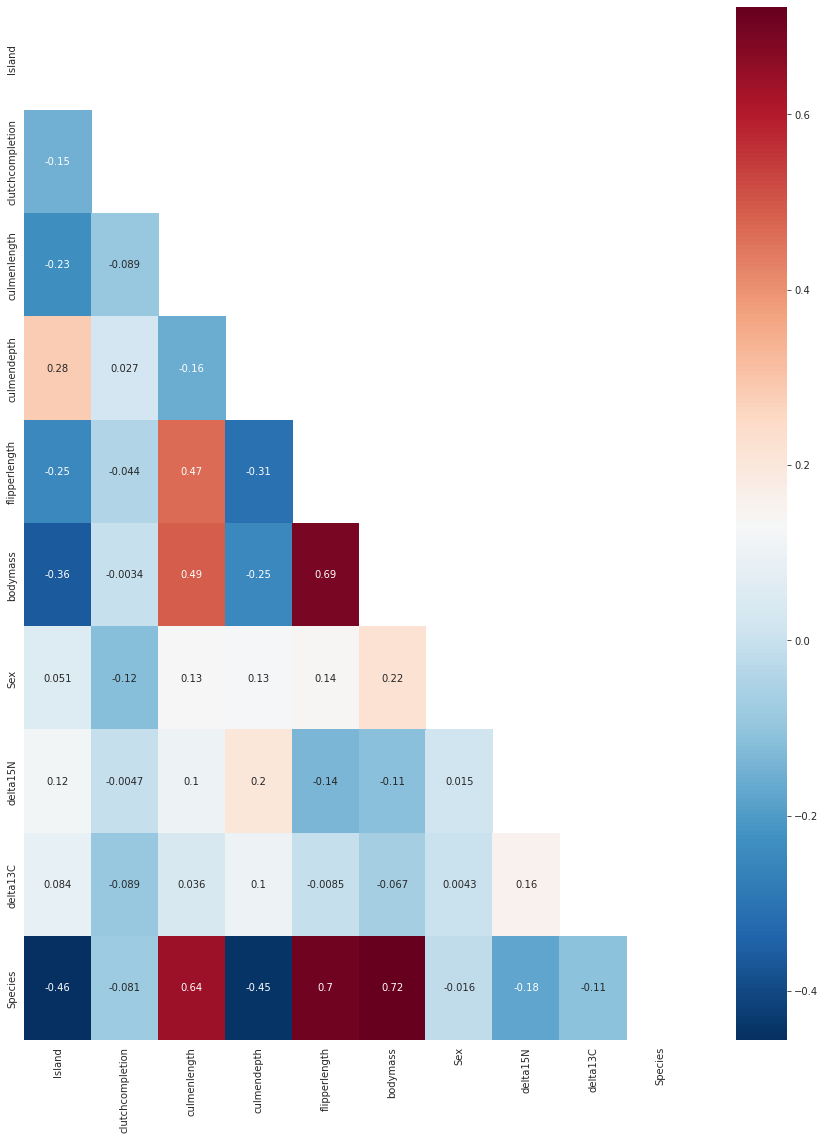

In [188]:
#heat map to analyse the correlation between the attributes
corr=df.corr()
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=1
sns.set_style('whitegrid')
plt.figure(figsize=(15,19))
sns.heatmap(corr,annot=True,cmap='RdBu_r',mask=mask)

In [189]:
#df = df.drop(columns=['bodymass'])

**Model construction and analysis**

In [190]:
df.shape

(372, 10)

In [191]:
#seperating the target variable from the data
x = df.drop(columns=['Species']) 

In [192]:
y = df['Species']

In [193]:
print(x.shape,y.shape)

(372, 9) (372,)


In [214]:
#splitting the data into train and test .
x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
x_test, x_valid, y_test, y_valid = train_test_split(x_test, y_test, test_size=0.5, random_state=42)

In [215]:
x_train = x_train.to_numpy()
y_train = y_train.to_numpy()
x_test = x_test.to_numpy()
y_test = y_test.to_numpy()
x_valid = x_valid.to_numpy()
y_valid = y_valid.to_numpy()

In [216]:
#for construction of the all vs all classifier seperating the data of each class...
x_train_0 = []
x_train_1 = []
x_train_2 = []
y_train_0 = []
y_train_1 = []
y_train_2 = []

for i in range(len(y_train)):
  if y_train[i] == 0:
    x_train_0.append(x_train[i])
    y_train_0.append(0)
  elif y_train[i] ==1:
    x_train_1.append(x_train[i])
    y_train_1.append(1)
  else:
    x_train_2.append(x_train[i])
    y_train_2.append(2)

x_train_0 = np.array(x_train_0)
x_train_1 = np.array(x_train_1)
x_train_2 = np.array(x_train_2)
y_train_0 = np.array(y_train_0)
y_train_1 = np.array(y_train_1)
y_train_2 = np.array(y_train_2)

In [217]:
#for construction of the all vs all classifier seperating the data of each class...
x_valid_0 = []
x_valid_1 = []
x_valid_2 = []
y_valid_0 = []
y_valid_1 = []
y_valid_2 = []

for i in range(len(y_valid)):
  if y_valid[i] == 0:
    x_valid_0.append(x_valid[i])
    y_valid_0.append(0)
  elif y_valid[i] == 1:
    x_valid_1.append(x_valid[i])
    y_valid_1.append(1)
  else:
    x_valid_2.append(x_valid[i])
    y_valid_2.append(2)

x_valid_0 = np.array(x_valid_0)
x_valid_1 = np.array(x_valid_1)
x_valid_2 = np.array(x_valid_2)
y_valid_0 = np.array(y_valid_0)
y_valid_1 = np.array(y_valid_1)
y_valid_2 = np.array(y_valid_2)

In [198]:
# a function used for the prediction by taking all the classifiers that learned
def make_prediction(x,classifier_0_1,classifier_1_2,classifier_2_0):
  y_pred_1 = classifier_0_1.predict(x)
  y_pred_2 = classifier_1_2.predict(x)
  y_pred_3 = classifier_2_0.predict(x)


  y_pred = []
  for i in range(len(y_pred_1)):
    list1 = [0,0,0]
    list1[y_pred_1[i]]+=1
    list1[y_pred_2[i]]+=1
    list1[y_pred_3[i]]+=1
    y_pred.append(list1.index(max(list1)))
  
  return y_pred
    

In [199]:
# a function used for the prediction by taking all the classifiers that learned
def make_prediction_mod(x,classifier_0_1,classifier_1_2,classifier_2_0,t1,t2,t3):
  y_pred_1_p = classifier_0_1.predict_proba(x)
  y_pred_2_p = classifier_1_2.predict_proba(x)
  y_pred_3_p = classifier_2_0.predict_proba(x)



  y_pred_1 = []
  y_pred_2 = []
  y_pred_3 = []

  for i in range(x.shape[0]):
    if(y_pred_1_p[:,1][i] >= t1):
      y_pred_1.append(1)
    else:
      y_pred_1.append(0)
  
  for i in range(x.shape[0]):
    if(y_pred_2_p[:,1][i] >= t2):
      y_pred_2.append(2)
    else:
      y_pred_2.append(1)
  
  for i in range(x.shape[0]):
    if(y_pred_3_p[:,1][i] >= t3):
      y_pred_3.append(2)
    else:
      y_pred_3.append(0)

  y_pred = []
  for i in range(len(y_pred_1)):
    list1 = [0,0,0]
    list1[y_pred_1[i]]+=1
    list1[y_pred_2[i]]+=1
    list1[y_pred_3[i]]+=1
    y_pred.append(list1.index(max(list1)))
  
  return y_pred
    

In [200]:
def make_prediction_proba(x,classifier_0_1,classifier_1_2,classifier_2_0):

  x1 = np.append(x_valid_0,x_valid_1,axis=0)
  x2 = np.append(x_valid_1,x_valid_2,axis=0)
  x3 = np.append(x_valid_2,x_valid_0,axis=0)

  y1 = np.append(y_valid_0,y_valid_1,axis=0)
  y2 = np.append(y_valid_1,y_valid_2,axis=0)
  y3 = np.append(y_valid_2,y_valid_0,axis=0)


  y_pred_1 = classifier_0_1.predict_proba(x1)
  y_pred_2 = classifier_1_2.predict_proba(x2)
  y_pred_3 = classifier_2_0.predict_proba(x3)

  fpr = {}
  tpr = {}
  thresh = {}


  fpr[0], tpr[0], thresh[0] = roc_curve(y1, y_pred_1[:,1], pos_label=1)
  fpr[1], tpr[1], thresh[1] = roc_curve(y2, y_pred_2[:,1], pos_label=2)
  fpr[2], tpr[2], thresh[2] = roc_curve(y3, y_pred_3[:,1], pos_label=2)
  
  # plotting    
  plt.plot(fpr[0], tpr[0], linestyle='--',color='orange', label='Class 0 vs Class 1')
  plt.plot(fpr[1], tpr[1], linestyle='--',color='green', label='Class 1 vs Class 2')
  plt.plot(fpr[2], tpr[2], linestyle='--',color='blue', label='Class 2 vs Class 0')
  plt.title('Multiclass ROC curve')
  plt.xlabel('False Positive Rate')
  plt.ylabel('True Positive rate')
  plt.legend(loc='best')

  


  auc_score1 = roc_auc_score(y1, y_pred_1[:,1],multi_class='ovo')
  auc_score2 = roc_auc_score(y2, y_pred_2[:,1],multi_class='ovo')
  auc_score3 = roc_auc_score(y3, y_pred_3[:,1],multi_class='ovo')

  print(auc_score2, auc_score2, auc_score3)

  return {0:[fpr[0], tpr[0], thresh[0]],1:[fpr[1], tpr[1], thresh[1]],2:[fpr[2], tpr[2], thresh[2]]}

**knn**

In [ ]:
# a function of building a knn classifier with crossvalidation of k=5
def make_classifier_knn(x1,x2,y1,y2,param_grid):
  x0 = np.append(x1,x2,axis=0)
  y0 = np.append(y1,y2,axis=0)
  neigh = KNeighborsClassifier()
  knn_gscv = GridSearchCV(neigh, param_grid, cv=5)
  knn_gscv.fit(x0,y0)
  return knn_gscv

In [ ]:
#parameters for hypertuning
param_grid = {'n_neighbors': np.arange(1, 25)}

In [ ]:
#driver code for the classfication
classifier_0_1 = make_classifier_knn(x_train_0,x_train_1,y_train_0,y_train_1,param_grid)
classifier_1_2 = make_classifier_knn(x_train_1,x_train_2,y_train_1,y_train_2,param_grid)
classifier_2_0 = make_classifier_knn(x_train_2,x_train_0,y_train_2,y_train_0,param_grid) 

1.0 1.0 0.9660633484162896


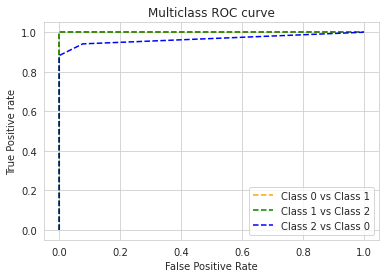

In [ ]:
dict_val = make_prediction_proba(x_valid,classifier_0_1,classifier_1_2,classifier_2_0)

In [ ]:
print("Class 0 vs Class 1")
print("{:30s} {:30s} {:30s}".format("FP rate", "TP rate", "Threshold"))
for i in range(len(dict_val[0][0])):
  print(f"{dict_val[0][0][i]:10.10f}{dict_val[0][1][i]:30.10f}{dict_val[0][2][i]:30.10f}")

Class 0 vs Class 1
FP rate                        TP rate                        Threshold                     
0.0000000000                  0.0000000000                  2.0000000000
0.0000000000                  0.6250000000                  1.0000000000
0.0000000000                  1.0000000000                  0.5555555556
0.1538461538                  1.0000000000                  0.1111111111
1.0000000000                  1.0000000000                  0.0000000000


In [ ]:
print("Class 1 vs Class 2")
print("{:30s} {:30s} {:30s}".format("FP rate", "TP rate", "Threshold"))
for i in range(len(dict_val[1][0])):
  print(f"{dict_val[1][0][i]:10.10f}{dict_val[1][1][i]:30.10f}{dict_val[1][2][i]:30.10f}")

Class 1 vs Class 2
FP rate                        TP rate                        Threshold                     
0.0000000000                  0.0000000000                  2.0000000000
0.0000000000                  0.8235294118                  1.0000000000
0.0000000000                  1.0000000000                  0.3043478261
0.1250000000                  1.0000000000                  0.2608695652
1.0000000000                  1.0000000000                  0.0000000000


In [ ]:
print("Class 2 vs Class 0")
print("{:30s} {:30s} {:30s}".format("FP rate", "TP rate", "Threshold"))
for i in range(len(dict_val[2][0])):
  print(f"{dict_val[2][0][i]:10.10f}{dict_val[2][1][i]:30.10f}{dict_val[2][2][i]:30.10f}")

Class 2 vs Class 0
FP rate                        TP rate                        Threshold                     
0.0000000000                  0.0000000000                  2.0000000000
0.0000000000                  0.8823529412                  1.0000000000
0.0769230769                  0.9411764706                  0.3333333333
1.0000000000                  1.0000000000                  0.0000000000


In [ ]:
#making prediction and calculating accuracy score and f1 score for the test data.
y_pred_mod = make_prediction_mod(x_test,classifier_0_1,classifier_1_2,classifier_2_0,0.5555555556,0.3043478261,0.3333333333)
print(accuracy_score(y_pred_mod,y_test))
print(f1_score(y_pred_mod,y_test,average=None))

0.972972972972973
[0.96296296 1.         0.96969697]


In [ ]:
#storing for analysis 
knn_accuracy_mod = accuracy_score(y_pred_mod,y_test)
knn_f1_mod = f1_score(y_pred_mod,y_test,average=None)
cm = confusion_matrix(y_test, y_pred_mod)

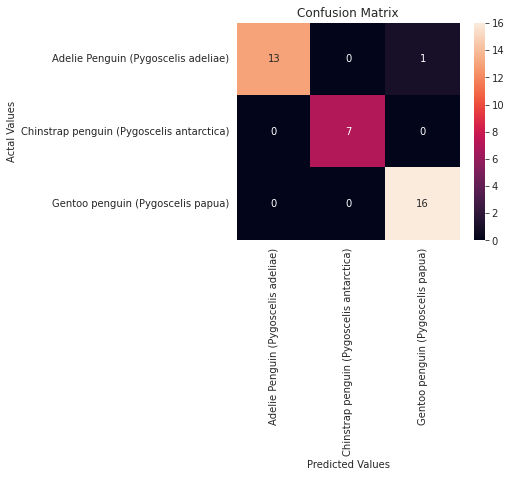

In [ ]:
cm_df = pd.DataFrame(cm,
                     index = labels, 
                     columns = labels)
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
#making prediction and calculating accuracy score and f1 score for the test data.
y_pred = make_prediction(x_test,classifier_0_1,classifier_1_2,classifier_2_0)
print(accuracy_score(y_pred,y_test))
print(f1_score(y_pred,y_test,average=None))

0.972972972972973
[0.96551724 1.         0.96774194]


In [ ]:
#storing for analysis 
knn_accuracy = accuracy_score(y_pred,y_test)
knn_f1 = f1_score(y_pred,y_test,average=None)
cm = confusion_matrix(y_test, y_pred)

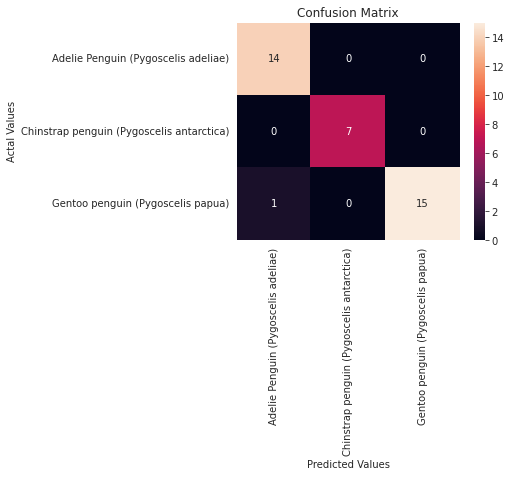

In [ ]:
cm_df = pd.DataFrame(cm,
                     index = labels, 
                     columns = labels)
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

**Decision Tree**

In [218]:
# a function of building a decision tree classifier with crossvalidation of k=5
def make_classifier_dtc(x1,x2,y1,y2,parameters):
  x0 = np.append(x1,x2,axis=0)
  y0 = np.append(y1,y2,axis=0)
  clf = GridSearchCV(DecisionTreeClassifier(), parameters, n_jobs=4)
  clf.fit(X=x0, y=y0)
  return clf

In [219]:
#parameters for hypertuning
parameters = {'max_depth':range(3,20)}

In [220]:
#driver code for the classfication
classifier_0_1 = make_classifier_dtc(x_train_0,x_train_1,y_train_0,y_train_1,parameters)
classifier_1_2 = make_classifier_dtc(x_train_1,x_train_2,y_train_1,y_train_2,parameters)
classifier_2_0 = make_classifier_dtc(x_train_2,x_train_0,y_train_2,y_train_0,parameters) 

0.9444444444444444 0.9444444444444444 1.0


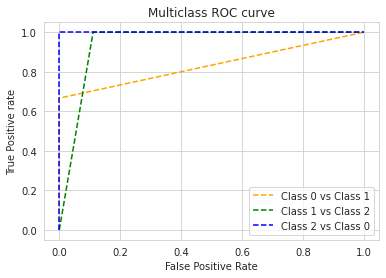

In [221]:
dict_val = make_prediction_proba(x_valid,classifier_0_1,classifier_1_2,classifier_2_0)

In [222]:
print("Class 0 vs Class 1")
print("{:30s} {:30s} {:30s}".format("FP rate", "TP rate", "Threshold"))
for i in range(len(dict_val[0][0])):
  print(f"{dict_val[0][0][i]:10.10f}{dict_val[0][1][i]:30.10f}{dict_val[0][2][i]:30.10f}")

Class 0 vs Class 1
FP rate                        TP rate                        Threshold                     
0.0000000000                  0.0000000000                  2.0000000000
0.0000000000                  0.6666666667                  1.0000000000
1.0000000000                  1.0000000000                  0.0000000000


In [223]:
print("Class 1 vs Class 2")
print("{:30s} {:30s} {:30s}".format("FP rate", "TP rate", "Threshold"))
for i in range(len(dict_val[1][0])):
  print(f"{dict_val[1][0][i]:10.10f}{dict_val[1][1][i]:30.10f}{dict_val[1][2][i]:30.10f}")

Class 1 vs Class 2
FP rate                        TP rate                        Threshold                     
0.0000000000                  0.0000000000                  2.0000000000
0.1111111111                  1.0000000000                  1.0000000000
1.0000000000                  1.0000000000                  0.0000000000


In [207]:
print("Class 2 vs Class 0")
print("{:30s} {:30s} {:30s}".format("FP rate", "TP rate", "Threshold"))
for i in range(len(dict_val[2][0])):
  print(f"{dict_val[2][0][i]:10.10f}{dict_val[2][1][i]:30.10f}{dict_val[2][2][i]:30.10f}")

Class 2 vs Class 0
FP rate                        TP rate                        Threshold                     
0.0000000000                  0.0000000000                  2.0000000000
0.0000000000                  1.0000000000                  1.0000000000
1.0000000000                  1.0000000000                  0.0000000000


In [208]:
#making prediction and calculating accuracy score and f1 score for the test data.
y_pred_mod = make_prediction_mod(x_test,classifier_0_1,classifier_1_2,classifier_2_0,1.0000000000,1.0000000000,0.9888888889)
print(accuracy_score(y_pred_mod,y_test))
print(f1_score(y_pred_mod,y_test,average=None))

0.918918918918919
[0.86956522 0.83333333 0.97435897]


In [209]:
#storing for analysis 
dt_accuracy_mod = accuracy_score(y_pred_mod,y_test)
dt_f1_mod = f1_score(y_pred_mod,y_test,average=None)
cm = confusion_matrix(y_test, y_pred_mod)

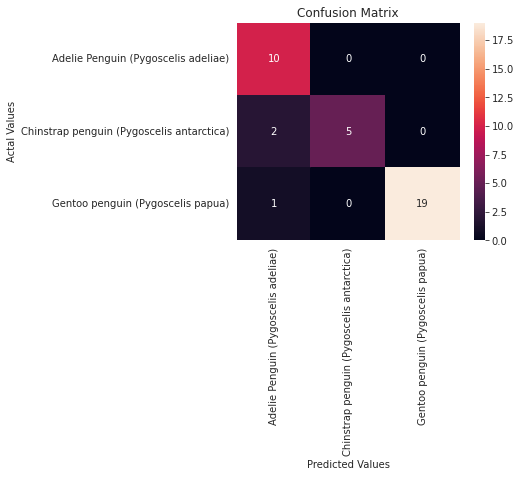

In [210]:
cm_df = pd.DataFrame(cm,
                     index = labels, 
                     columns = labels)
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [211]:
#making prediction and calculating accuracy score and f1 score for the test data.
y_pred = make_prediction(x_test,classifier_0_1,classifier_1_2,classifier_2_0)
print(accuracy_score(y_pred,y_test))
print(f1_score(y_pred,y_test,average=None))

0.918918918918919
[0.86956522 0.83333333 0.97435897]


In [212]:
#storing for analysis 
dt_accuracy = accuracy_score(y_pred,y_test)
dt_f1 = f1_score(y_pred,y_test,average=None)
cm = confusion_matrix(y_test, y_pred)

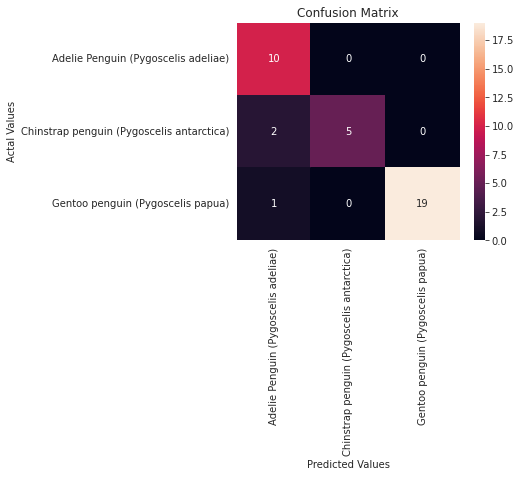

In [213]:
cm_df = pd.DataFrame(cm,
                     index = labels, 
                     columns = labels)
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

**Random forest**

In [ ]:
# a function of building a random forest classifier with crossvalidation of k=5
def make_classifier_rf(x1,x2,y1,y2,parameters):
  x0 = np.append(x1,x2,axis=0)
  y0 = np.append(y1,y2,axis=0)
  clf = GridSearchCV(RandomForestClassifier(), parameters, n_jobs=4)
  clf.fit(X=x0, y=y0)
  
  return clf

In [ ]:
#parameters for hypertuning
parameters = {'max_depth':range(3,20)}

In [ ]:
#driver code for the classfication
classifier_0_1 = make_classifier_rf(x_train_0,x_train_1,y_train_0,y_train_1,parameters)
classifier_1_2 = make_classifier_rf(x_train_1,x_train_2,y_train_1,y_train_2,parameters)
classifier_2_0 = make_classifier_rf(x_train_2,x_train_0,y_train_2,y_train_0,parameters) 

0.9926470588235294 0.9926470588235294 0.9909502262443439


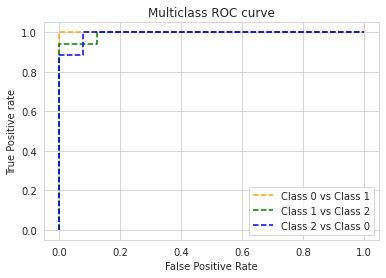

In [ ]:
dict_val = make_prediction_proba(x_valid,classifier_0_1,classifier_1_2,classifier_2_0)

In [ ]:
print("Class 0 vs Class 1")
print("{:30s} {:30s} {:30s}".format("FP rate", "TP rate", "Threshold"))
for i in range(len(dict_val[0][0])):
  print(f"{dict_val[0][0][i]:10.10f}{dict_val[0][1][i]:30.10f}{dict_val[0][2][i]:30.10f}")

Class 0 vs Class 1
FP rate                        TP rate                        Threshold                     
0.0000000000                  0.0000000000                  1.9933724583
0.0000000000                  0.1250000000                  0.9933724583
0.0000000000                  1.0000000000                  0.4339041504
1.0000000000                  1.0000000000                  0.0020278043


In [ ]:
print("Class 1 vs Class 2")
print("{:30s} {:30s} {:30s}".format("FP rate", "TP rate", "Threshold"))
for i in range(len(dict_val[1][0])):
  print(f"{dict_val[1][0][i]:10.10f}{dict_val[1][1][i]:30.10f}{dict_val[1][2][i]:30.10f}")

Class 1 vs Class 2
FP rate                        TP rate                        Threshold                     
0.0000000000                  0.0000000000                  2.0000000000
0.0000000000                  0.5294117647                  1.0000000000
0.0000000000                  0.7647058824                  0.9500000000
0.0000000000                  0.9411764706                  0.6100000000
0.1250000000                  0.9411764706                  0.2900000000
0.1250000000                  1.0000000000                  0.2400000000
0.5000000000                  1.0000000000                  0.0200000000
1.0000000000                  1.0000000000                  0.0000000000


In [ ]:
print("Class 2 vs Class 0")
print("{:30s} {:30s} {:30s}".format("FP rate", "TP rate", "Threshold"))
for i in range(len(dict_val[2][0])):
  print(f"{dict_val[2][0][i]:10.10f}{dict_val[2][1][i]:30.10f}{dict_val[2][2][i]:30.10f}")

Class 2 vs Class 0
FP rate                        TP rate                        Threshold                     
0.0000000000                  0.0000000000                  1.9997373670
0.0000000000                  0.2352941176                  0.9997373670
0.0000000000                  0.4117647059                  0.9949754623
0.0000000000                  0.5294117647                  0.9897373670
0.0000000000                  0.8823529412                  0.9273087956
0.0769230769                  0.8823529412                  0.2310000000
0.0769230769                  1.0000000000                  0.1860000000
0.1538461538                  1.0000000000                  0.0405000000
0.3076923077                  1.0000000000                  0.0200000000
0.5384615385                  1.0000000000                  0.0005000000
1.0000000000                  1.0000000000                  0.0000000000


In [ ]:
#making prediction and calculating accuracy score and f1 score for the test data.
y_pred_mod = make_prediction_mod(x_test,classifier_0_1,classifier_1_2,classifier_2_0,0.4339041504,0.6100000000,0.1860000000)
print(accuracy_score(y_pred_mod,y_test))
print(f1_score(y_pred_mod,y_test,average=None))

0.9459459459459459
[0.92307692 0.93333333 0.96969697]


In [ ]:
#storing for analysis 
rf_accuracy_mod = accuracy_score(y_pred_mod,y_test)
rf_f1_mod = f1_score(y_pred_mod,y_test,average=None)
cm = confusion_matrix(y_test, y_pred_mod)

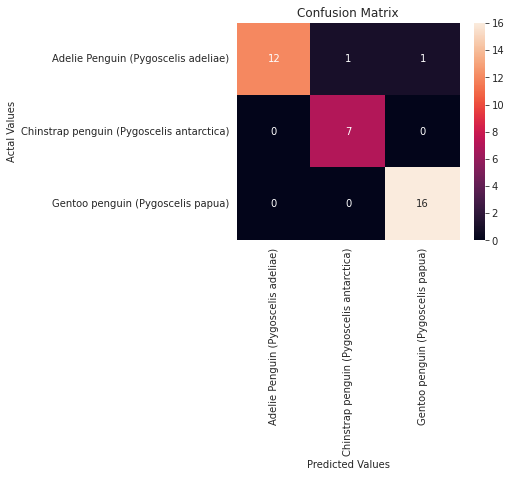

In [ ]:
cm_df = pd.DataFrame(cm,
                     index = labels, 
                     columns = labels)
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

In [ ]:
#making prediction and calculating accuracy score and f1 score for the test data.
y_pred = make_prediction(x_test,classifier_0_1,classifier_1_2,classifier_2_0)
print(accuracy_score(y_pred,y_test))
print(f1_score(y_pred,y_test,average=None))

0.9459459459459459
[0.92857143 0.92307692 0.96969697]


In [ ]:
#storing for analysis 
rf_accuracy = accuracy_score(y_pred,y_test)
rf_f1 = f1_score(y_pred,y_test,average=None)
cm = confusion_matrix(y_test, y_pred)

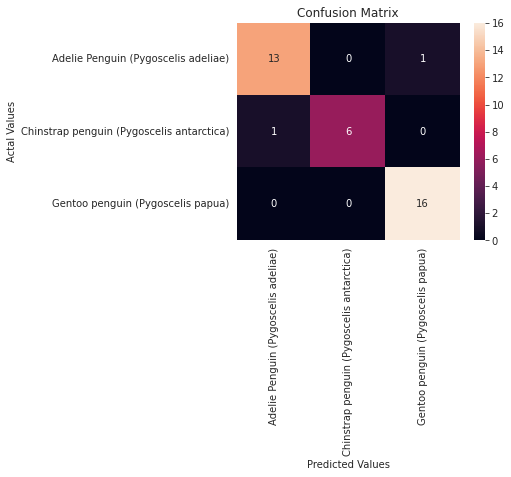

In [ ]:
cm_df = pd.DataFrame(cm,
                     index = labels, 
                     columns = labels)
plt.figure(figsize=(5,4))
sns.heatmap(cm_df, annot=True)
plt.title('Confusion Matrix')
plt.ylabel('Actal Values')
plt.xlabel('Predicted Values')
plt.show()

**plotting the accuracies and f1 score of different classifier**

In [ ]:
sns.set_style('white')
plt.figure(figsize=(9,9))


<Figure size 648x648 with 0 Axes>

<Figure size 648x648 with 0 Axes>

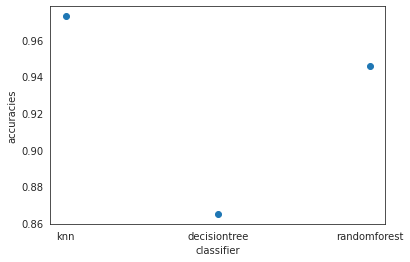

<Figure size 648x648 with 0 Axes>

In [ ]:
accuracies = [knn_accuracy,dt_accuracy,rf_accuracy]
# naming the x axis
plt.xlabel('classifier')
# naming the y axis
plt.ylabel('accuracies')
plt.plot(['knn','decisiontree','randomforest'],accuracies,'o')
plt.figure(figsize=(9,9))
plt.show()

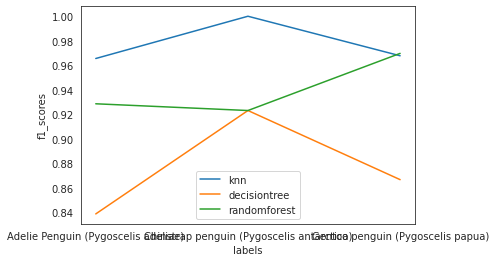

In [ ]:
f1_scores = [knn_f1,dt_f1,rf_f1]
plt.xlabel("labels")
plt.ylabel("f1_scores")
classifiers = ['knn','decisiontree','randomforest']
for i in range(len(f1_scores)):
    plt.plot(labels,f1_scores[i],label = classifiers[i])
plt.legend()
plt.show()

**analysis of feature selection**

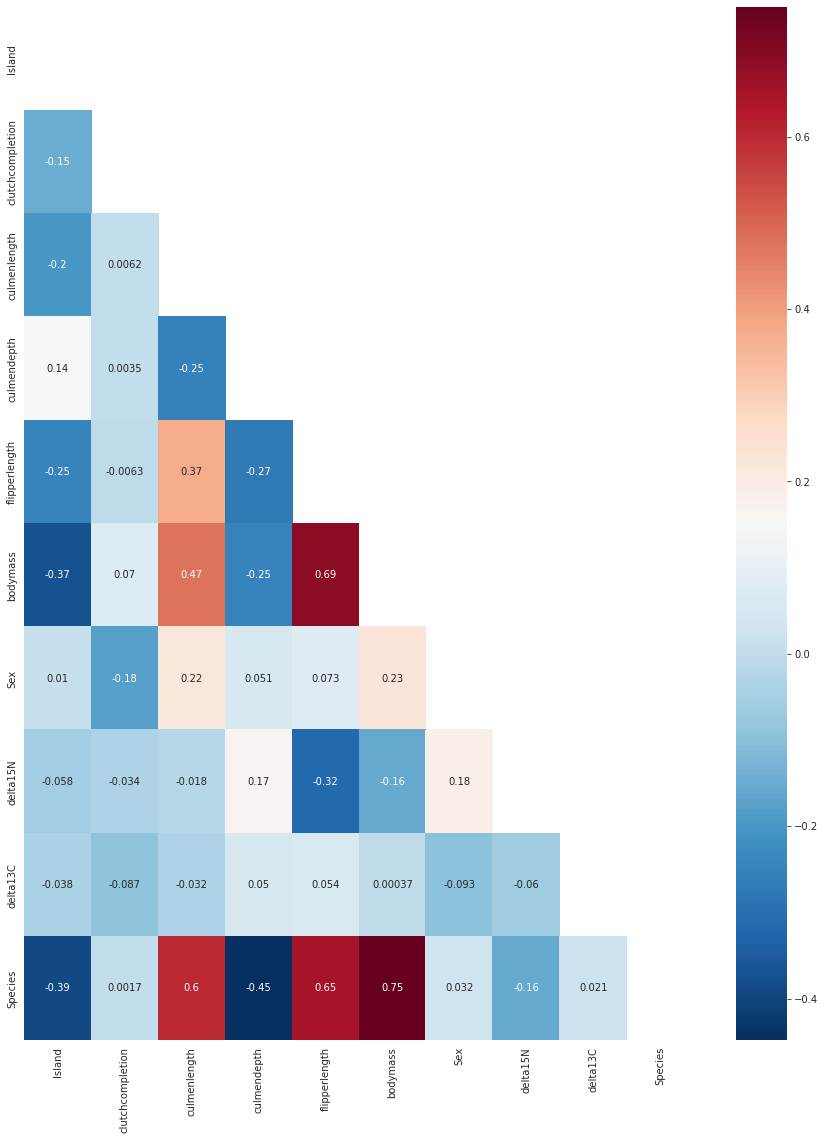

In [ ]:
#heat map to analyse the correlation between the attributes
corr=df.corr()
mask=np.zeros_like(corr)
mask[np.triu_indices_from(mask)]=1
sns.set_style('whitegrid')
plt.figure(figsize=(15,19))
sns.heatmap(corr,annot=True,cmap='RdBu_r',mask=mask)

In [ ]:
def analyse_feature_selection(df,column):
  df = df.drop(columns=column)
  x = df.drop(columns=['Species'])
  y = df['Species']
  x_train, x_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=42)
  x_train = x_train.to_numpy()
  y_train = y_train.to_numpy()
  x_test = x_test.to_numpy()
  y_test = y_test.to_numpy()
  #for construction of the all vs all classifier seperating the data of each class...
  x_train_0 = []
  x_train_1 = []
  x_train_2 = []
  y_train_0 = []
  y_train_1 = []
  y_train_2 = []

  for i in range(len(y_train)):
    if y_train[i] == 0:
      x_train_0.append(x_train[i])
      y_train_0.append(0)
    elif y_train[i] ==1:
      x_train_1.append(x_train[i])
      y_train_1.append(1)
    else:
      x_train_2.append(x_train[i])
      y_train_2.append(2)

  x_train_0 = np.array(x_train_0)
  x_train_1 = np.array(x_train_1)
  x_train_2 = np.array(x_train_2)
  y_train_0 = np.array(y_train_0)
  y_train_1 = np.array(y_train_1)
  y_train_2 = np.array(y_train_2)

  param_grid = {'n_neighbors': np.arange(1, 25)}

  classifier_0_1 = make_classifier_knn(x_train_0,x_train_1,y_train_0,y_train_1,param_grid)
  classifier_1_2 = make_classifier_knn(x_train_1,x_train_2,y_train_1,y_train_2,param_grid)
  classifier_2_0 = make_classifier_knn(x_train_2,x_train_0,y_train_2,y_train_0,param_grid) 

  y_pred = make_prediction(x_test,classifier_0_1,classifier_1_2,classifier_2_0)
  print(accuracy_score(y_pred,y_test))
  print(f1_score(y_pred,y_test,average=None))

  knn_accuracy = accuracy_score(y_pred,y_test)
  knn_f1 = f1_score(y_pred,y_test,average=None)

  return knn_accuracy,knn_f1


In [ ]:
all_accuracy,all_f1 = analyse_feature_selection(df,[])
bodymass_accuracy,bodymass_f1 = analyse_feature_selection(df,['bodymass'])
culmen_accuracy,culmen_f1 = analyse_feature_selection(df,['culmenlength'])
flipper_accuracy,flipper_f1 = analyse_feature_selection(df,['flipperlength'])
bc_accuracy,bc_f1 = analyse_feature_selection(df,['bodymass','culmenlength'])
bf_accuracy,bf_f1 = analyse_feature_selection(df,['bodymass','flipperlength'])
cf_accuracy,cf_f1 = analyse_feature_selection(df,['flipperlength','culmenlength'])
bcf_accuracy,bcf_f1 = analyse_feature_selection(df,['flipperlength','culmenlength','bodymass'])

0.96
[0.94736842 1.         0.95238095]
0.96
[0.96428571 0.96774194 0.95238095]
0.8933333333333333
[0.87272727 0.77419355 0.96875   ]
0.96
[0.94736842 1.         0.95238095]
0.8533333333333334
[0.85185185 0.77419355 0.89230769]
0.8933333333333333
[0.92857143 0.82758621 0.89230769]
0.8533333333333334
[0.82142857 0.70967742 0.95238095]
0.8666666666666667
[0.8627451  0.75       0.92537313]


In [ ]:
headings = ['all_features','rem_bm','rem_cl',
            'rem_fl','rem_bm_cl','rem_bm_fl','rem_cl_fl','rem_bm_cl_fl']
accuracies = [all_accuracy,bodymass_accuracy,culmen_accuracy,flipper_accuracy,bc_accuracy,bf_accuracy,cf_accuracy,bcf_accuracy]


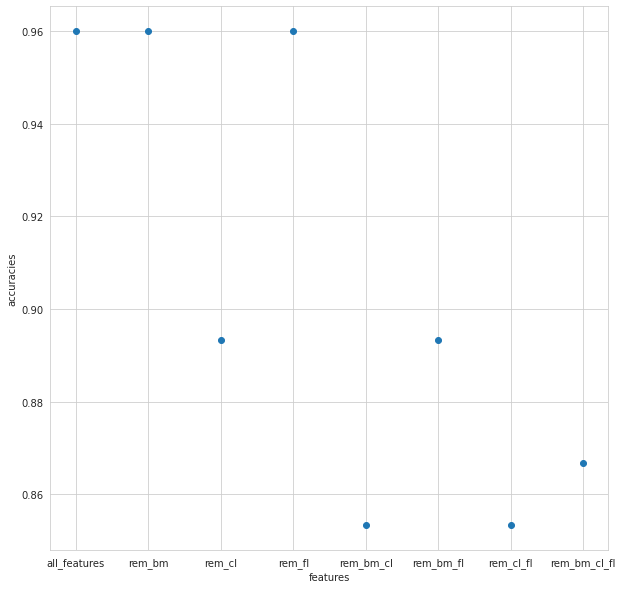

In [ ]:
plt.figure(figsize=(10,10))
plt.xlabel('features')
# naming the y axis
plt.ylabel('accuracies')
plt.plot(headings,accuracies,'o')
plt.show()

In [ ]:
len(f1_scores[0])

3

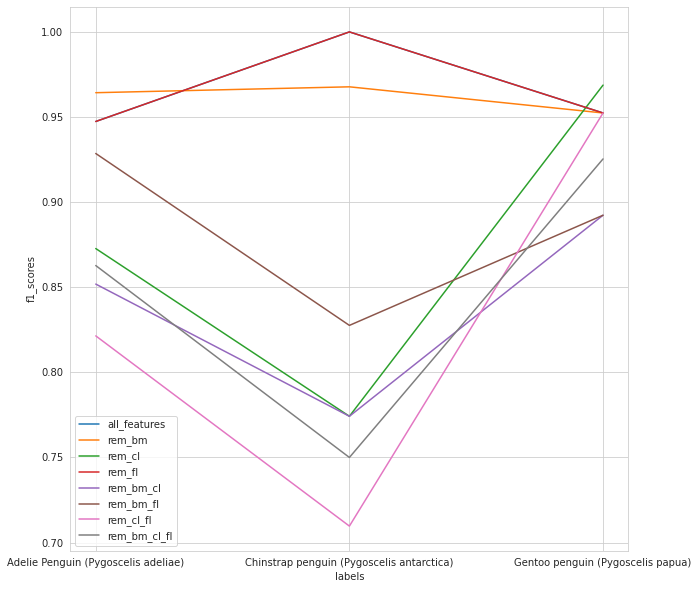

In [ ]:
f1_scores = [all_f1,bodymass_f1,culmen_f1,flipper_f1,bc_f1,bf_f1,cf_f1,bcf_f1]
plt.figure(figsize=(10,10))
plt.xlabel("labels")
plt.ylabel("f1_scores")
#classifiers = ['knn','decisiontree','randomforest']
for i in range(len(f1_scores)):
    plt.plot(labels,f1_scores[i],label = headings[i])
plt.legend()
plt.show()